In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('ushape.csv', header=None, names=['X', 'Y', 'class'])

In [9]:
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


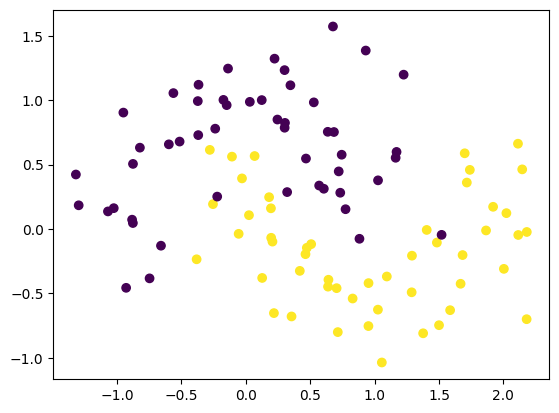

In [10]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [12]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [14]:
model = Sequential()

model.add(Dense(10, activation='tanh', input_dim=2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.get_weights()

[array([[-0.26538926,  0.4212994 ,  0.57430655,  0.11994368, -0.5138982 ,
         -0.4756147 , -0.521663  ,  0.3604837 ,  0.69378906, -0.03121513],
        [-0.1183517 ,  0.4161896 ,  0.6598671 , -0.40063125, -0.4959293 ,
          0.38988513,  0.30661243,  0.27894843, -0.5274435 , -0.21974033]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.26480585, -0.21969071,  0.47257614,  0.10413587, -0.3246058 ,
         -0.4032914 ,  0.3825395 , -0.23080942,  0.23987192,  0.24553275],
        [ 0.3596446 ,  0.5372406 , -0.3331296 ,  0.54061127,  0.29981905,
         -0.01492602,  0.2409882 ,  0.37144953,  0.42377687,  0.42326796],
        [ 0.06672966,  0.135741  ,  0.22127187,  0.18519711,  0.42535883,
          0.39898986,  0.07544351, -0.1390523 , -0.45894024, -0.0278852 ],
        [-0.41954768,  0.15675235, -0.5166619 , -0.03807455,  0.08847296,
         -0.18621597,  0.29052407,  0.50769436,  0.49951828, -0.5341723 ],
        [-0.14781

In [23]:
initial_weights = model.get_weights()

In [24]:
initial_weights[0] = np.random.randn(2,10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1) * np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [25]:
model.set_weights(initial_weights)

In [26]:
model.get_weights()

[array([[ 0.91251034, -0.63663906,  0.5192337 , -0.52062947,  0.05748705,
         -0.11948406,  0.91155416, -0.90398896, -0.31144103, -0.8490903 ],
        [-1.5096508 , -0.17531538, -0.03158022, -0.20251481,  1.0774397 ,
          1.0897523 , -0.8758147 ,  0.96280295,  0.54902834,  0.06597423]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.33313423,  0.01197636, -0.63653517, -0.289353  , -0.2407727 ,
         -0.10009894, -0.5268202 ,  0.22824179,  0.06916769, -0.15489307],
        [ 0.06832256,  0.31342724, -0.26341656,  0.1961417 , -0.16997223,
         -0.19731738, -0.5768994 , -0.29080465, -0.41106662,  0.00750201],
        [ 0.02648348,  0.21646158, -0.14585088, -0.20215963,  0.04949393,
          0.25397444,  0.02119267,  0.1398777 , -0.03774211, -0.22372146],
        [ 0.49411467, -0.04082995,  0.3746465 , -0.25674677, -0.35550168,
         -0.00370357,  0.01166762, -0.25561428,  0.42676616,  0.33250478],
        [-0.02707

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(X, Y, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8609 - loss: 0.3717 - val_accuracy: 0.9000 - val_loss: 0.2814
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8570 - loss: 0.3872 - val_accuracy: 0.9000 - val_loss: 0.2814
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8805 - loss: 0.3534 - val_accuracy: 0.9000 - val_loss: 0.2816
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8922 - loss: 0.3230 - val_accuracy: 0.9000 - val_loss: 0.2811
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8609 - loss: 0.3712 - val_accuracy: 0.9000 - val_loss: 0.2811
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8687 - loss: 0.3724 - val_accuracy: 0.9000 - val_loss: 0.2812
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8492 - loss: 0.4000 - val_accuracy: 0.9000 - val_loss: 0.2817
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8453 - loss: 0.4056 - val_accuracy: 0.9000 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

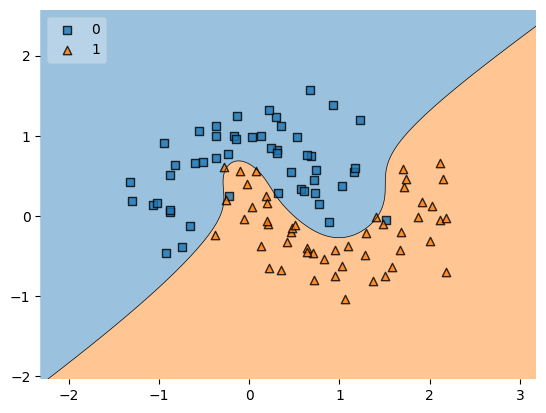

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y.astype('int'), clf=model, legend=2)